In [219]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid") 
plt.style.use("fivethirtyeight")

# Reading File

In [220]:
df= pd.read_excel(r"C:\Users\spjay\Desktop\Shack Labs\DS-assignment\DS - Assignment Part 1 data set.xlsx")

In [221]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [222]:
#data shape
df.shape

(414, 9)

In [223]:
#infromation of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [224]:
#checking null values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [225]:
#checking dublicate values
df.duplicated().sum()

0

In [226]:
#descibtion of dataset
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [227]:
#informaation of columns
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')


# Visualization

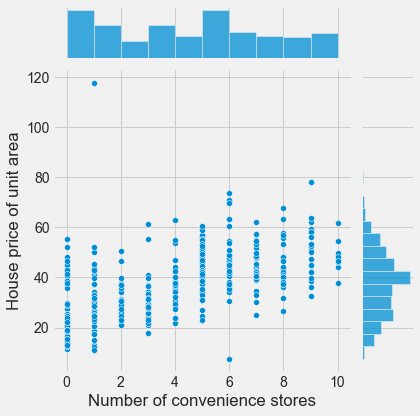

In [228]:
sns.jointplot(df['Number of convenience stores'] , df['House price of unit area'])

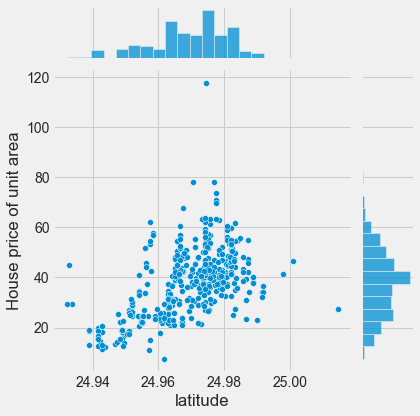

In [229]:
sns.jointplot(df['latitude'],df['House price of unit area'])

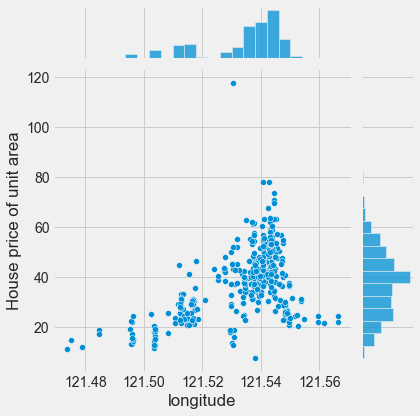

In [230]:
sns.jointplot(df['longitude'],df['House price of unit area'])

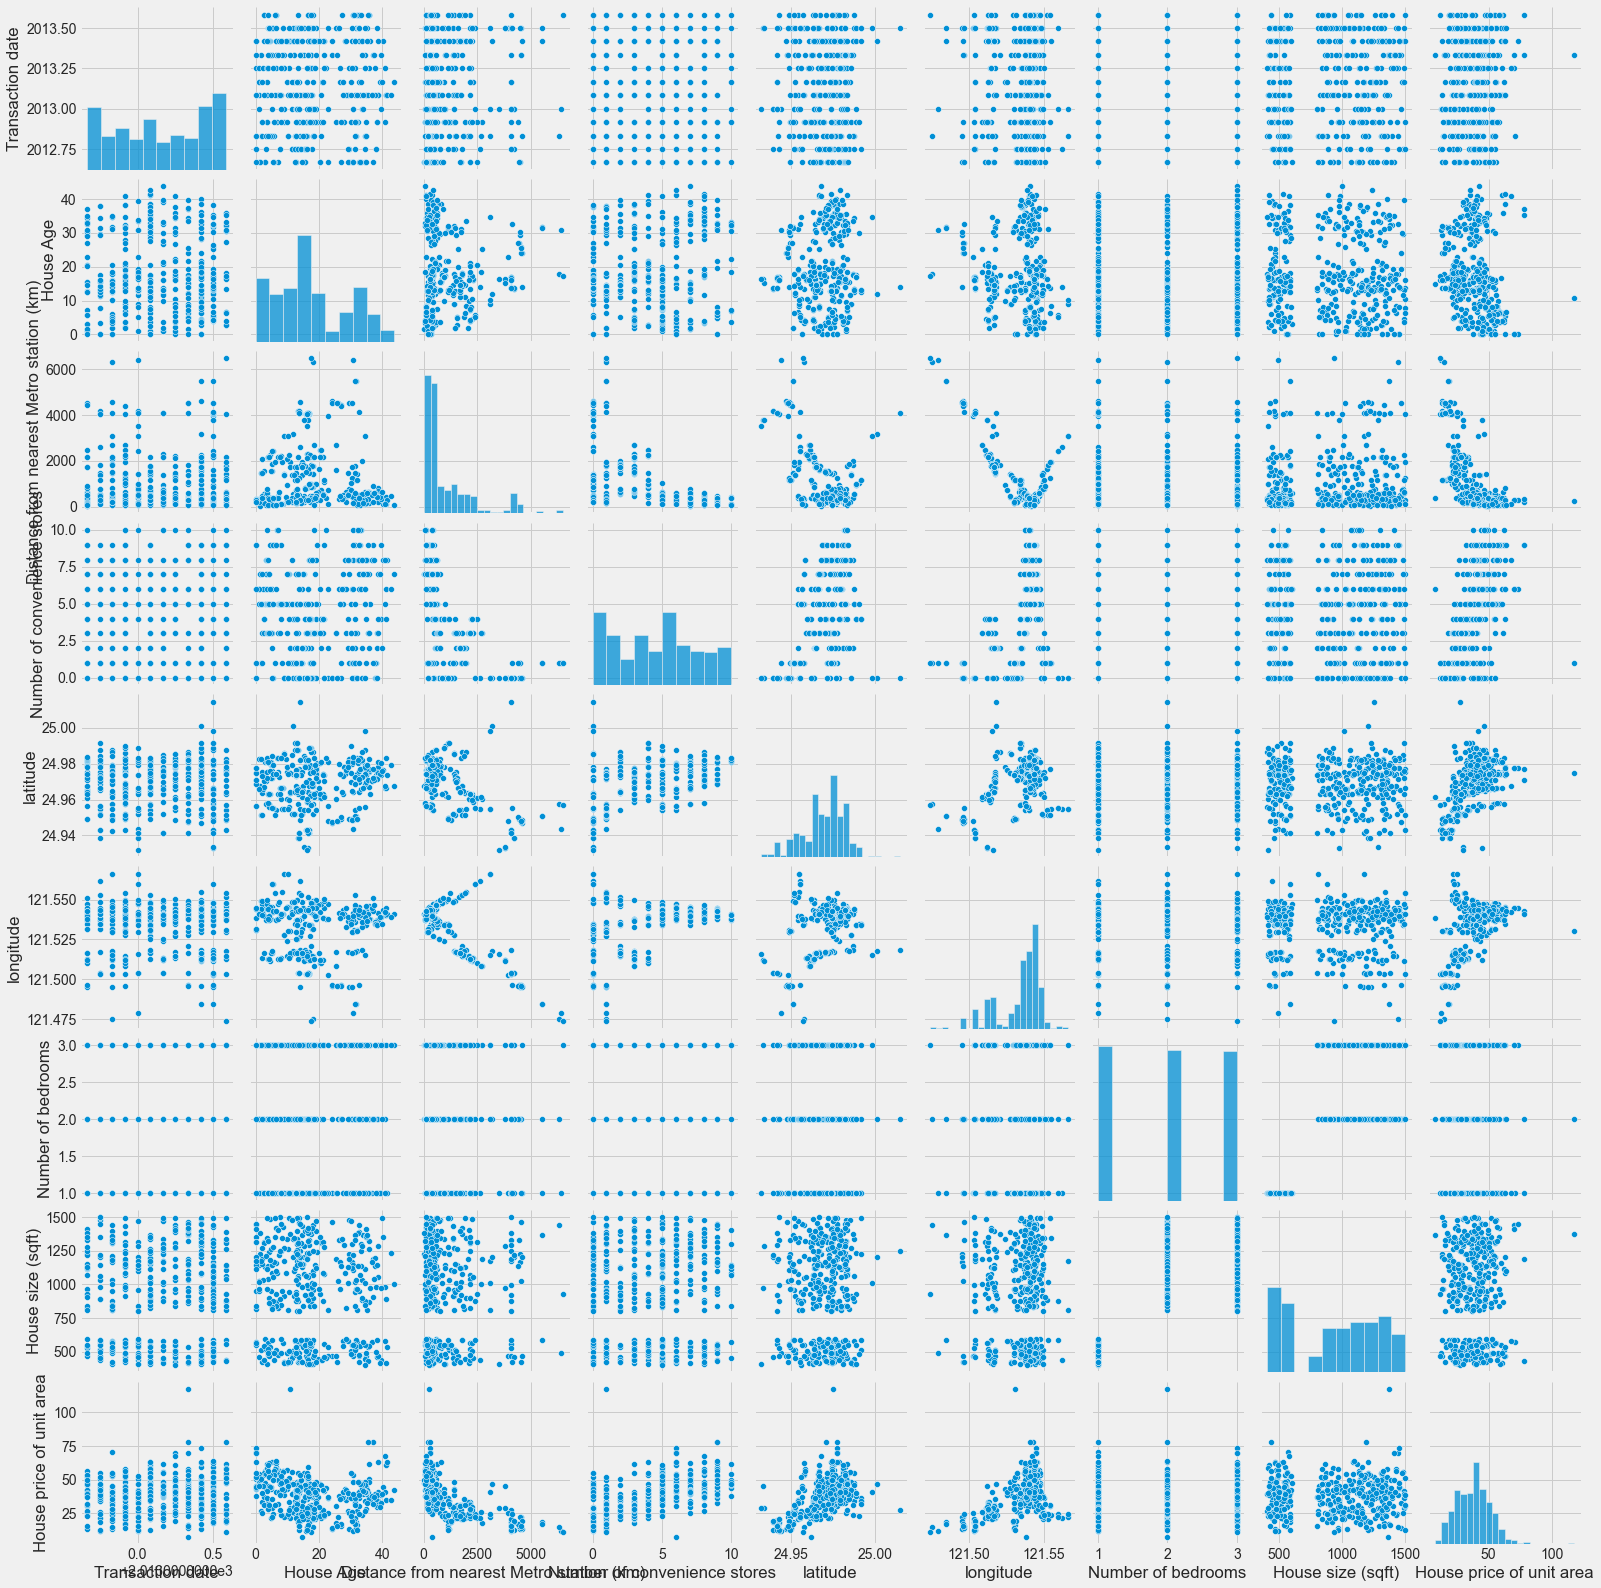

In [231]:
sns.pairplot(df)

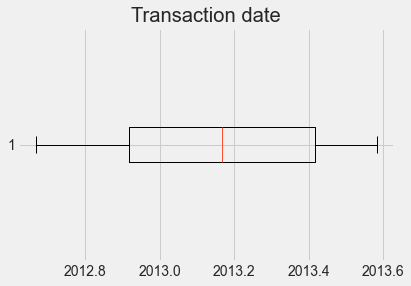

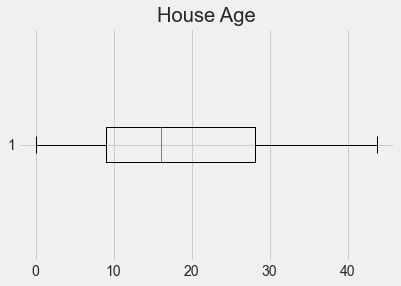

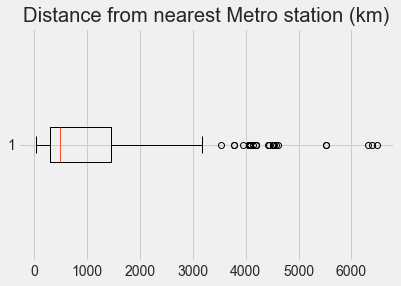

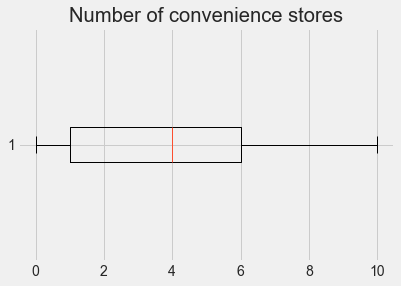

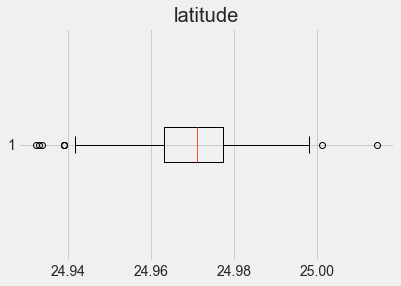

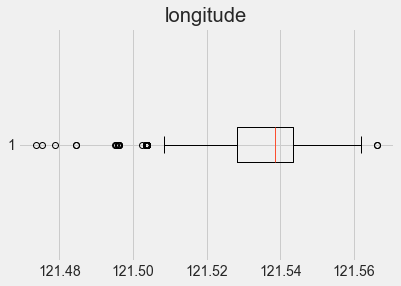

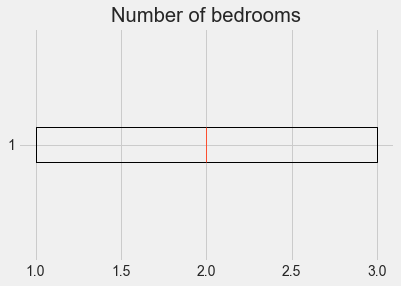

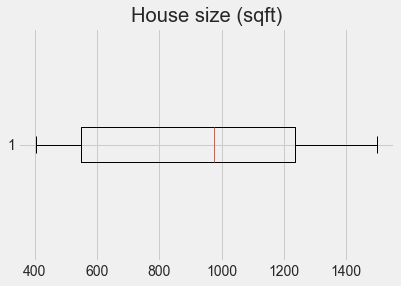

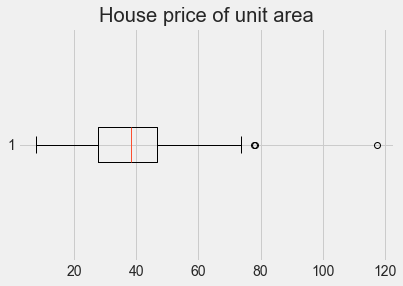

In [232]:
for indx,col in zip(range(0, len(df.columns)), df.columns):
    plt.title(df.columns[indx])
    plt.boxplot(df[col], vert = False)
    plt.show()

<AxesSubplot:>

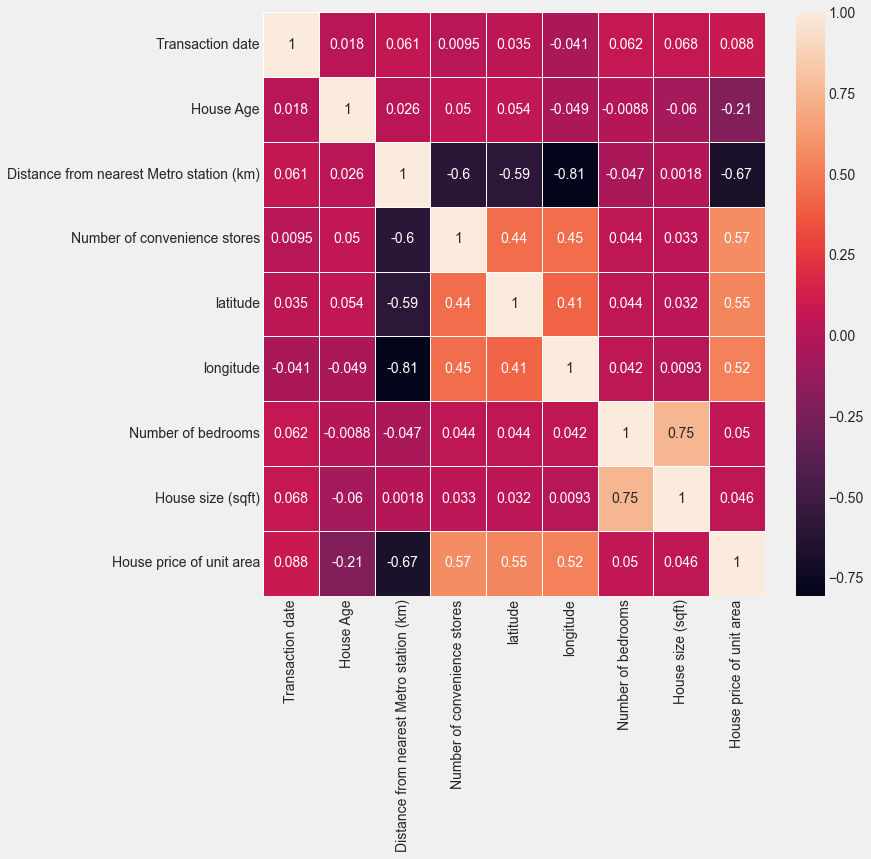

In [233]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(df.corr(),annot=True,linewidths=.5, ax=ax)

Linear Regression

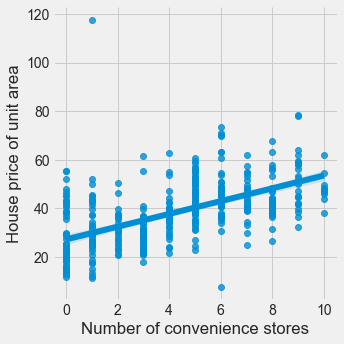

In [234]:
sns.lmplot(x='Number of convenience stores',y=('House price of unit area'),data=df)

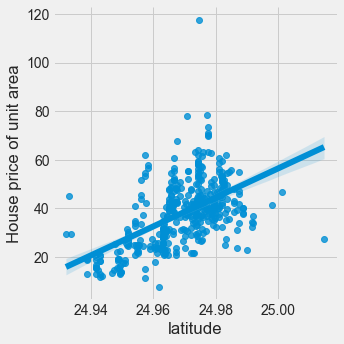

In [235]:
sns.lmplot(x='latitude',y=('House price of unit area'),data=df)

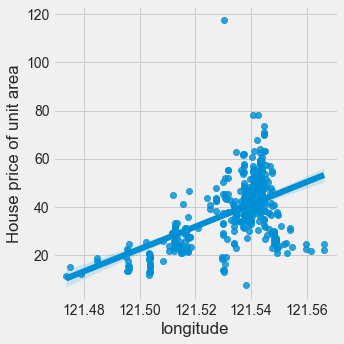

In [236]:
sns.lmplot(x='longitude',y=('House price of unit area'),data=df)

# Machine Learning Models

### Data Preparation

In [237]:
# Create separate object for target variable
y = df['House price of unit area']

# Create separate object for input features
X = df.drop('House price of unit area', axis=1)

In [238]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [239]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 8) (83, 8) (331,) (83,)


### LR

In [240]:
# fitting data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [241]:
coeff_df = pd.DataFrame(lr.coef_,X.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
Transaction date,5.023808
House Age,-0.264193
Distance from nearest Metro station (km),-0.004456
Number of convenience stores,1.093895
latitude,225.998880
longitude,-6.579408
Number of bedrooms,0.137875
House size (sqft),-0.000387


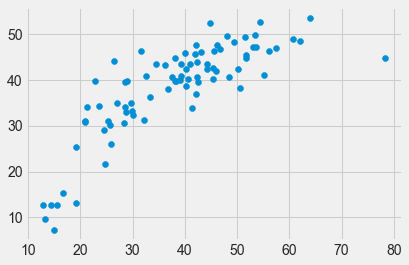

In [242]:
prediction= lr.predict(X_test)
plt.scatter(y_test,prediction)

In [243]:
import sklearn.metrics as metrics
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE", metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.76323427726555
MSE 59.75353802454883
RMSE: 7.730041269265568


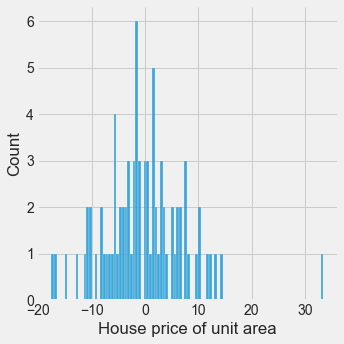

In [244]:
sns.displot((y_test-prediction),bins=100)

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

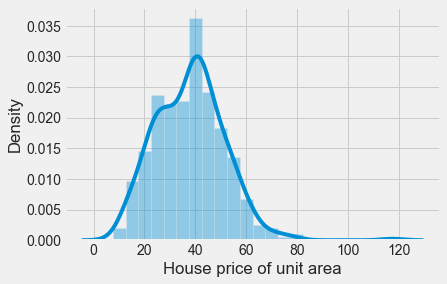

In [245]:
sns.distplot(df["House price of unit area"])

In [246]:
accuracy=lr.score(X_test,y_test)*100
print (f"The accurancy of the model is {round (accuracy, 2)}%")

The accurancy of the model is 65.6%


### Randomforest

In [247]:
from sklearn.ensemble import RandomForestRegressor

rand_clf = RandomForestRegressor()
rand_clf.fit(X_train, y_train)

RandomForestRegressor()

In [248]:
y_pred = rand_clf.predict(X_test)

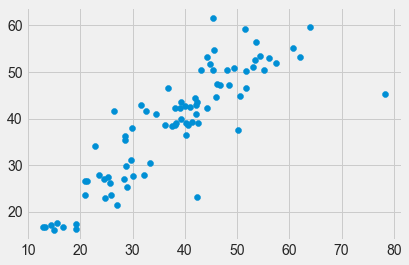

In [249]:
prediction= rand_clf.predict(X_test)
plt.scatter(y_test,prediction)

In [250]:
import sklearn.metrics as metrics
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE", metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4.585192771084335
MSE 45.186336686746984
RMSE: 6.722078301146676


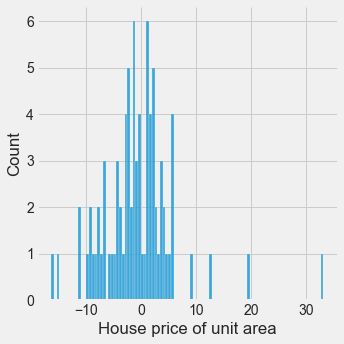

In [251]:
sns.displot((y_test-prediction),bins=100)

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

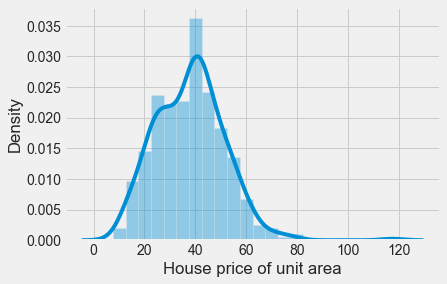

In [252]:
sns.distplot(df["House price of unit area"])

In [253]:
accuracy=rand_clf.score(X_test,y_test)*100
print (f"The accurancy of the model is {round (accuracy, 2)}%")

The accurancy of the model is 73.99%


### DT

In [254]:
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)


DecisionTreeRegressor()

In [255]:
# model predictions 

y_pred = dtc.predict(X_test)

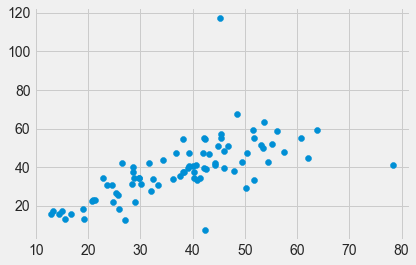

In [256]:
prediction= dtc.predict(X_test)
plt.scatter(y_test,prediction)

In [257]:
import sklearn.metrics as metrics
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE", metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.509638554216867
MSE 151.96349397590362
RMSE: 12.327347402255832


In [258]:
lr_ac=dtc.score(X_test,y_test)*100
print (f"The accurancy of the model is {round (lr_ac, 2)}%")

The accurancy of the model is 12.51%


### KNN

In [259]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [260]:
# model predictions 

y_pred = knn.predict(X_test)

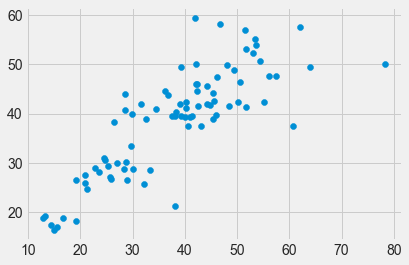

In [261]:
prediction= knn.predict(X_test)
plt.scatter(y_test,prediction)

In [262]:
import sklearn.metrics as metrics
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE", metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.491084337349397
MSE 56.72059759036145
RMSE: 7.531307827353856


In [263]:
accuracy=knn.score(X_test,y_test)*100
print (f"The accurancy of the model is {round (accuracy, 2)}%")

The accurancy of the model is 67.35%


# Conclusion

### After comparing all models we get Random Forest models accuracy higest which is 71.48% also its RSME Score is low that is 7.53. Hence, we have found the best models among our proposed models.